# 第六章线性回归

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 随机种子，确保每次运行结果一致
torch.manual_seed(42)

# 生成训练数据
X = torch.randn(100, 2)  # 100 个样本，每个样本 2 个特征
true_w = torch.tensor([2.0, 3.0])  # 假设真实权重
true_b = 4.0  # 偏置项
Y = X @ true_w + true_b + torch.randn(100) * 0.1  # 加入一些噪声，@是矩阵乘法

# 打印部分数据
print(X[:5])
print(Y[:5])

tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        [-0.0431, -1.6047],
        [-0.7521,  1.6487]])
tensor([12.4460, -0.4663,  1.7666, -0.9357,  7.4781])


In [2]:
import torch.nn as nn

# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 定义一个线性层，输入为2个特征，输出为1个预测值
        self.linear = nn.Linear(2, 1)  # 输入维度2，输出维度1
    
    def forward(self, x):
        return self.linear(x)  # 前向传播，返回预测结果

# 创建模型实例
model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [3]:
# 损失函数（均方误差）
criterion = nn.MSELoss()

# 优化器（使用 SGD 或 Adam）
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率设置为0.01

In [5]:
# 训练模型
num_epochs = 1000  # 训练 1000 轮
for epoch in range(num_epochs):
    model.train()

    predictions=model(X)
    loss = criterion(predictions.squeeze(),Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(epoch+1)%100==0:
        print(f'epoch[{epoch+1}/1000,loss:{loss.item():.4f}')

epoch[100/1000,loss:0.4569
epoch[200/1000,loss:0.0142
epoch[300/1000,loss:0.0082
epoch[400/1000,loss:0.0081
epoch[500/1000,loss:0.0081
epoch[600/1000,loss:0.0081
epoch[700/1000,loss:0.0081
epoch[800/1000,loss:0.0081
epoch[900/1000,loss:0.0081
epoch[1000/1000,loss:0.0081


In [6]:
# 查看训练后的权重和偏置
print(f'Predicted weight: {model.linear.weight.data.numpy()}')
print(f'Predicted bias: {model.linear.bias.data.numpy()}')

Predicted weight: [[2.009702  2.9986038]]
Predicted bias: [4.020908]


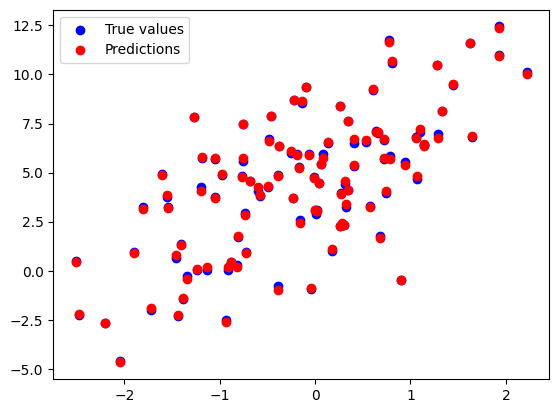

In [7]:
#在新的数据上做预测
with torch.no_grad():
    predictions=model(X)

# 可视化预测与实际值
plt.scatter(X[:, 0], Y, color='blue', label='True values')
plt.scatter(X[:, 0], predictions, color='red', label='Predictions')
plt.legend()
plt.show()

'''
model.linear.weight.data 和 model.linear.bias.data：这些属性存储了模型的权重和偏置。
torch.no_grad()：在评估模式下，不需要计算梯度，节省内存。
'''